In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("produits_aziza_filtered.csv",delimiter=",")
data

,Nom du Produit,Prix (TND)
0,Gaufrette chocolat 110 G Dcroc Gaufrette tiram...,1.49
1,Biscuit fourré goût vanille 190 G TOM Lot 2 co...,1.55
2,Lot de 5 yaourts brassés fraise gaufrette 5* 7...,1.72
3,Boisson gazeuse citron 1 L Viva Boisson gazeus...,1.99
4,Lot de 2 Pains de mie 14 tranches complet Lot ...,2.00
5,Lot de 6 yaourts aromatisés banane 6* 100G Vit...,2.65
6,Lot 6 browniz cacao 6* 60 G Lot 3 brioches fou...,2.84
7,Nouasser artisanal 500 G BIT EL MOUNA Lot de 5...,2.99
8,Lot de 4 boissons instantanées orange 4* 40 G ...,3.10
9,Chamia nature 200 G Le moulin Lot de 3 boites ...,3.58


# New Section

In [8]:
data.describe()

,Prix (TND)
count,15.000000
mean,3.619333
std,2.260883
min,1.490000
25%,1.995000
50%,2.990000
75%,4.395000
max,9.990000


In [9]:
data.isnull().sum()


,0
Nom du Produit,0
Prix (TND),0


In [10]:
# Vérifier le nombre de valeurs manquantes par colonne
print("Valeurs manquantes par colonne :")
print(data.isnull().sum())

Valeurs manquantes par colonne :
Nom du Produit    0
Prix (TND)        0
dtype: int64


In [11]:
# Vérifier le nombre de doublons
print("Nombre de doublons :", data.duplicated().sum())

Nombre de doublons : 0


In [14]:
data = data.sort_values(by="Prix (TND)", ascending=False)

<ipython-input-20-ea7d4a424c11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Nom du Produit"], y=data["Prix (TND)"], palette="viridis")


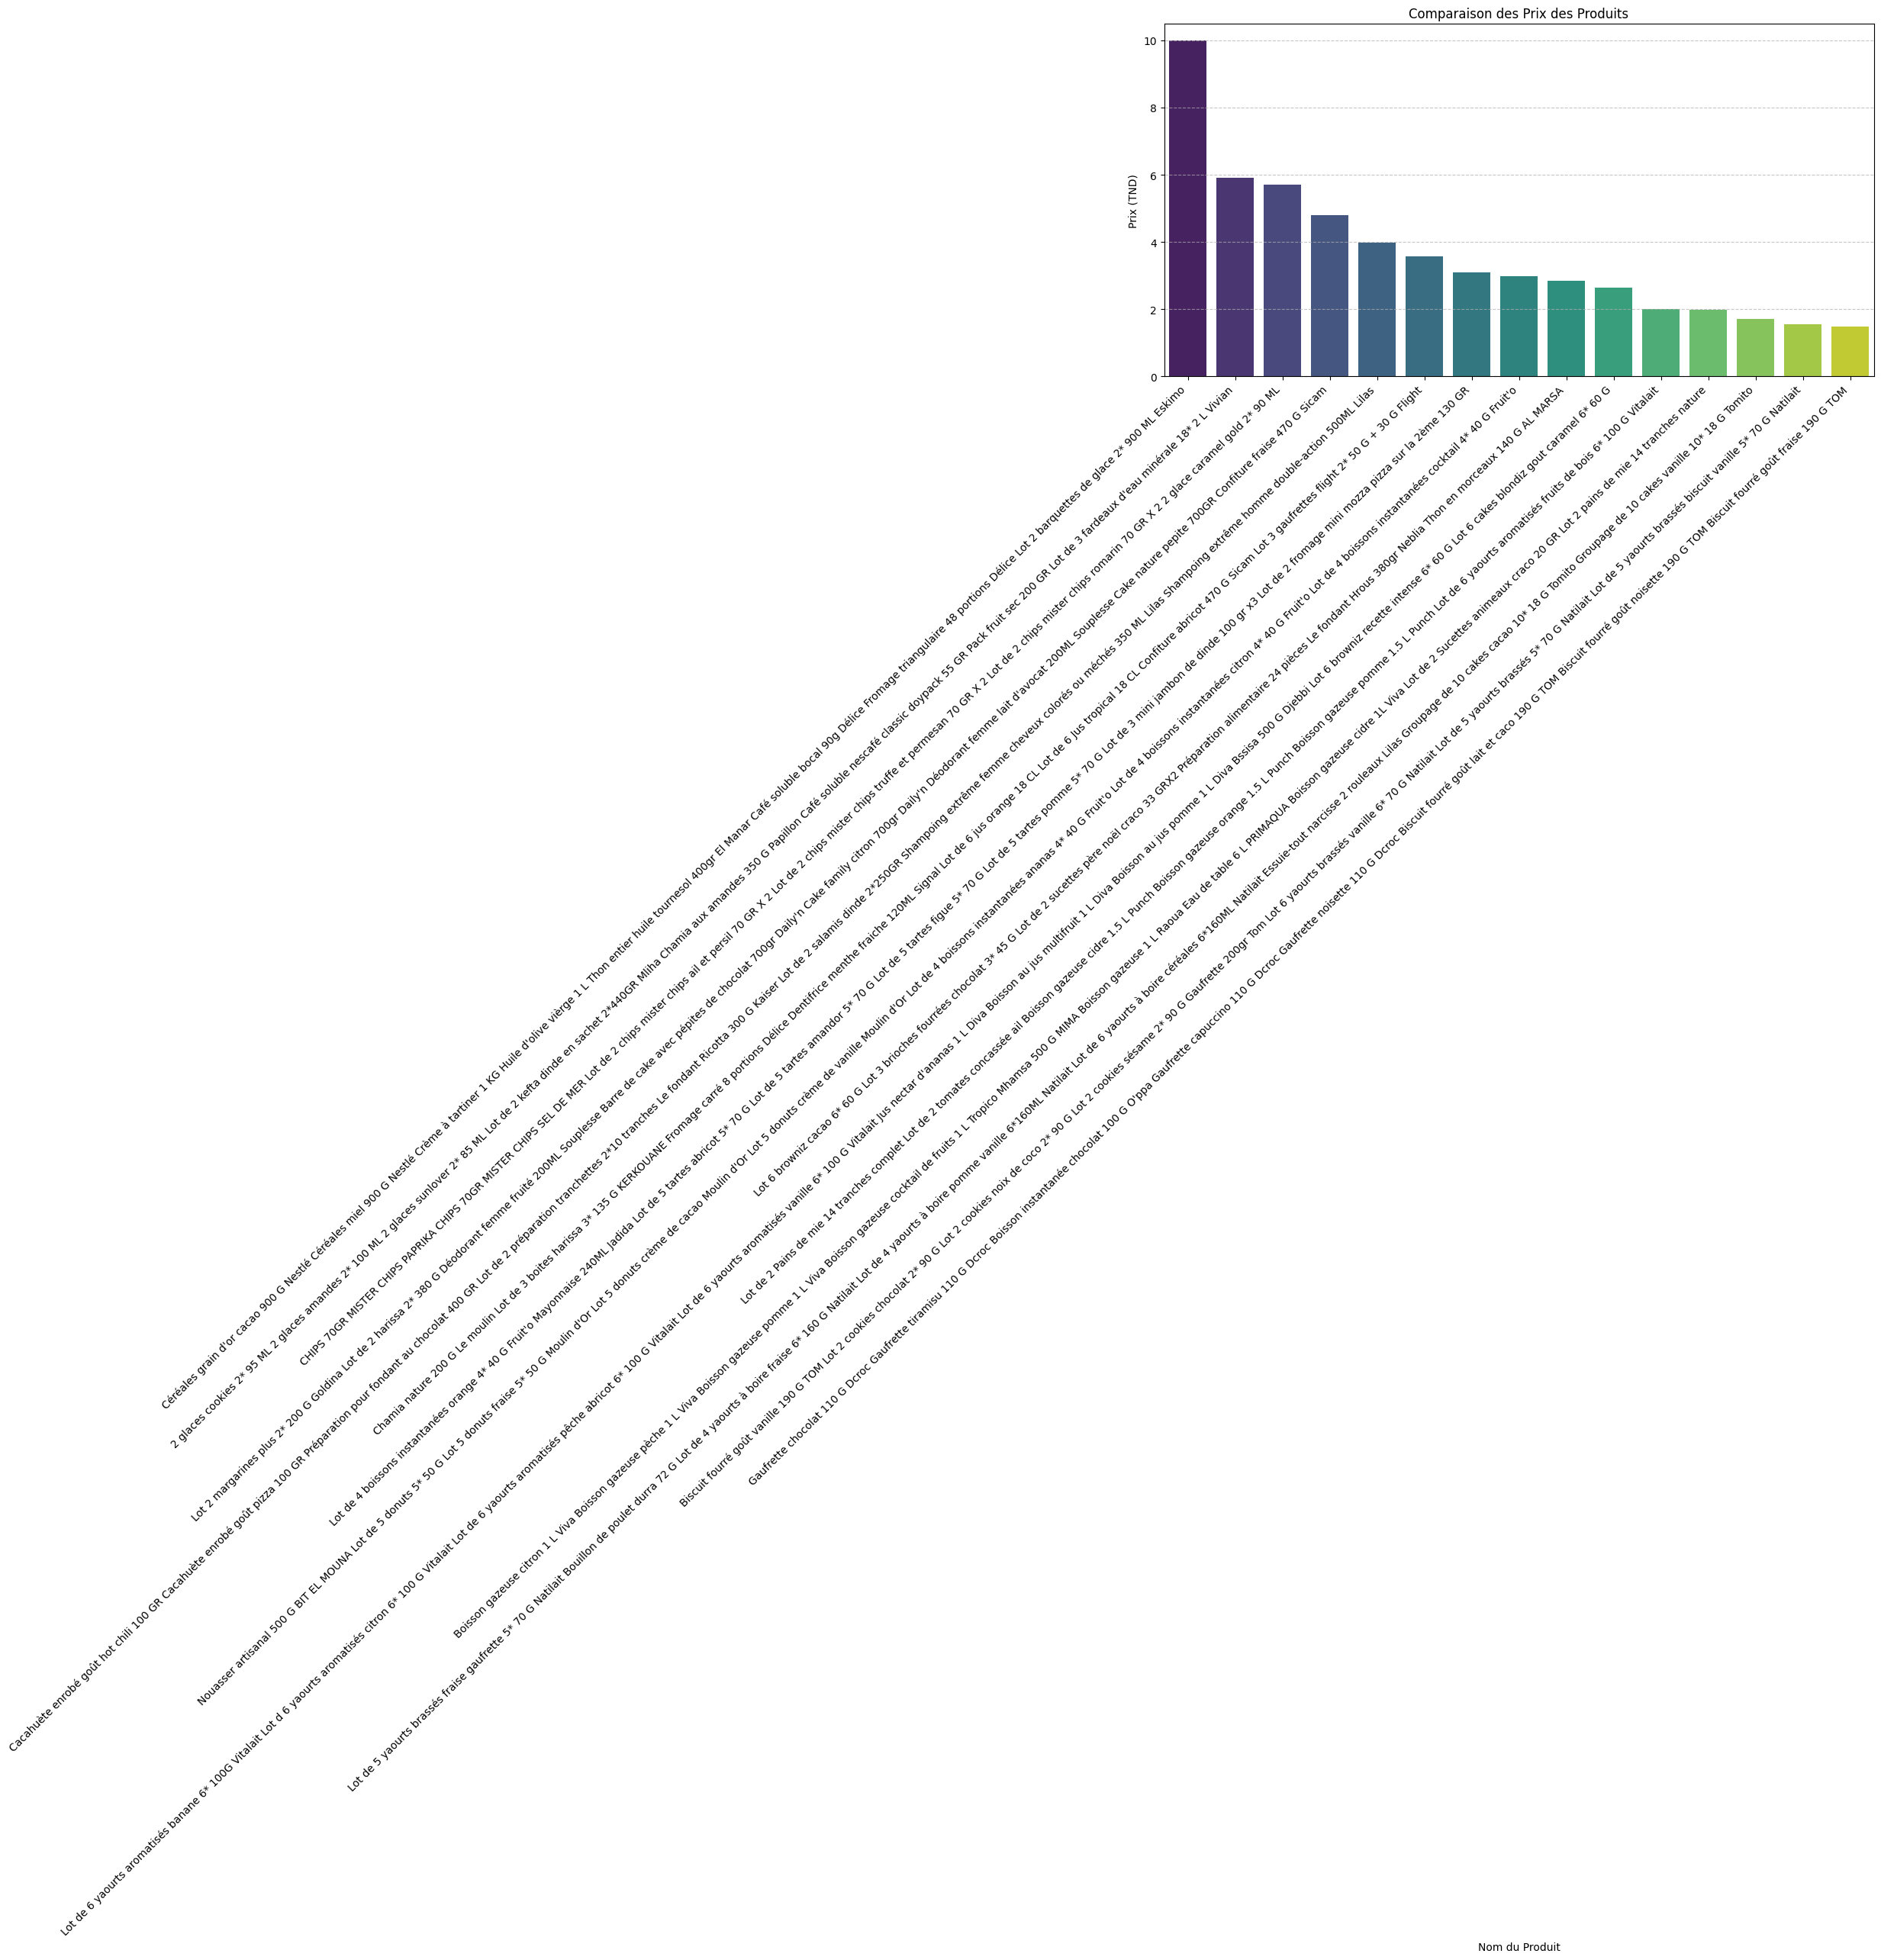

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data["Nom du Produit"], y=data["Prix (TND)"], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Nom du Produit")
plt.ylabel("Prix (TND)")
plt.title("Comparaison des Prix des Produits")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

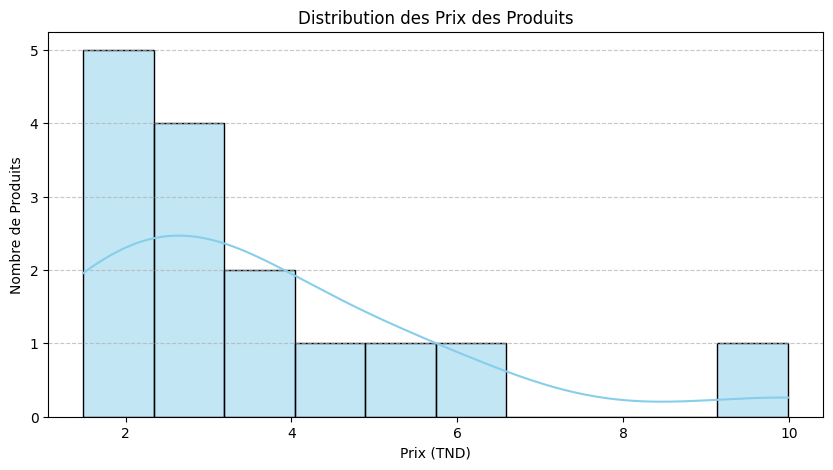

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data["Prix (TND)"], bins=10, kde=True, color="skyblue")

plt.xlabel("Prix (TND)")
plt.ylabel("Nombre de Produits")
plt.title("Distribution des Prix des Produits")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [26]:
# Vérifier les types de données
print(data.dtypes)

# Sélectionner les colonnes numériques
data_numeric = data.select_dtypes(include=["number"])
print(data_numeric.head())

Nom du Produit      object
Prix (TND)         float64
prix_group        category
dtype: object
    Prix (TND)
14        9.99
13        5.90
12        5.70
11        4.80
10        3.99


In [27]:
import numpy as np

# Détection des valeurs aberrantes avec l'IQR
Q1 = data_numeric.quantile(0.25)  # Premier quartile (25%)
Q3 = data_numeric.quantile(0.75)  # Troisième quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile

# Définition des seuils
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
outliers = (data_numeric < low) | (data_numeric > high)
print("Valeurs aberrantes détectées :")
print(data_numeric[outliers.any(axis=1)])

Valeurs aberrantes détectées :
    Prix (TND)
14        9.99


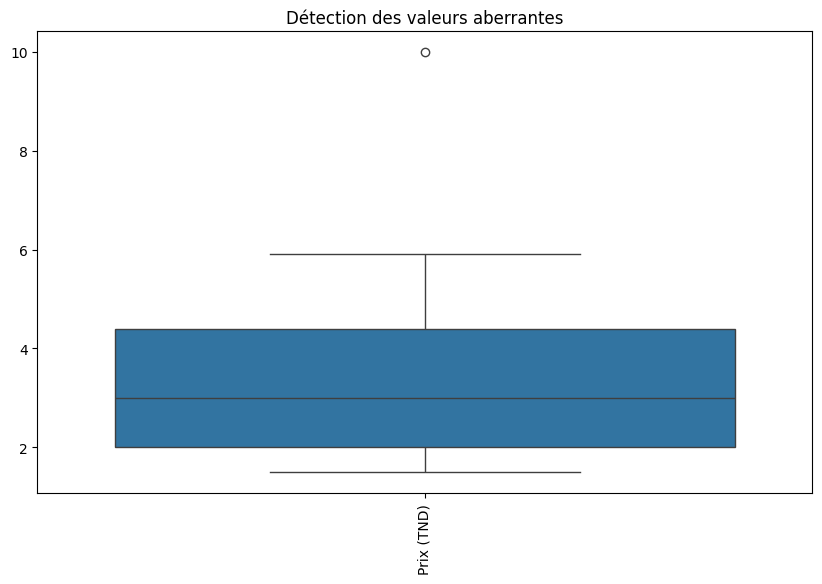

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher les boxplots pour toutes les colonnes numériques
plt.figure(figsize=(10,6))
sns.boxplot(data=data_numeric)
plt.xticks(rotation=90)  # Rotation des noms de colonnes si nécessaire
plt.title("Détection des valeurs aberrantes")
plt.show()